

# Movie industry landscape

__Presenters: Quentin Grigsby & Mark Thai__

__Questions to answer:__

1.Which are some of the major studios ? Annual gross bookings per each player ? How concentrated is the industry? What is the minimum threshold that Microsoft needs to achieve in order to become a top 10 movie studio?

2.Trends in terms of average gross bookings and average production cost over time

3.Correlation btw average gross bookings and average cost to produce - where is the diminishing returns ? from ROI perspective, what is the typical range of gross booking / production cost ratio for top 100 movies ?

4.Distribution of gross bookings per movie

5.Distribution of production cost per movie



In [421]:
import mysql.connector
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
#import mysql.connector


In [454]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
#import pandas & matplotlib & numpy


In [405]:
#Query out all movie studios and their gross bookings each year since 2013

movie_studios = """SELECT studio, COALESCE(domestic_gross,0) as domestic_gross , COALESCE(foreign_gross,0) as foreign_gross , year 
FROM movies.bom_movie_gross
where year >=2013 and year <=2018 
group by year, studio
;"""
 

In [406]:
#our dataframe

df = pd.read_sql_query(movie_studios, con)
df

,studio,domestic_gross,foreign_gross,year
0,A23,13200,0,2013
1,A24,14100000,17600000,2013
2,AF,76900,0,2013
3,Anch.,74900,0,2013
4,ATO,13500,794000,2013
...,...,...,...,...
502,VPD,289000,46800000,2018
503,WB,335100000,812700000,2018
504,WB (NL),101000000,327000000,2018
505,WGUSA,1500000,577700000,2018


In [409]:
#save our data into a csv file
df.to_csv("data/studio_gross.csv", index = False)

In [408]:
df['Total_Gross'] = df['domestic_gross'] + df['foreign_gross']
df

,studio,domestic_gross,foreign_gross,year,Total_Gross
0,A23,13200,0,2013,13200
1,A24,14100000,17600000,2013,31700000
2,AF,76900,0,2013,76900
3,Anch.,74900,0,2013,74900
4,ATO,13500,794000,2013,807500
...,...,...,...,...,...
502,VPD,289000,46800000,2018,47089000
503,WB,335100000,812700000,2018,1147800000
504,WB (NL),101000000,327000000,2018,428000000
505,WGUSA,1500000,577700000,2018,579200000


We want to build a function where it will take 3 parameters: a dataframe (df), a year (year), and number of values (n), to see which are the top movie studios in a given year and their total gross bookings in that year. We would like to see how concentrated the industry by calculating % of total gross bookings coming from the top 5, 10 movie studios in a given year.  


In [106]:
df.groupby(['studio']).sum().sort_values(by = 'Total_Gross', ascending=False)

,domestic_gross,foreign_gross,year,Total_Gross
studio,,,,
BV,3377700000,2773500002,12093,6151200002
Uni.,2159200000,2338300002,12093,4497500002
WB,1855900000,2636500000,12093,4492400000
Sony,1095200000,3212900000,12093,4308100000
Fox,1455300000,2815500000,12093,4270800000
...,...,...,...,...
FOR,10200,0,2015,10200
KS,5900,0,2014,5900
TAFC,4600,0,2015,4600


In [439]:
#This function will take 3 parameters: df, year (from 2013-2018), and number of top studios. If you want to see 
#aggregate value for all years, input 0 for the 'year' parameter  

def top(df, year, n):
    if year > 0:
        new_df = df.loc[df['year'] == year].sort_values(by = 'Total_Gross', ascending=False)
    else: new_df = df.groupby(['studio'], as_index=False).sum().sort_values(by = 'Total_Gross', ascending=False).drop(columns=['year'])
    return new_df.head(n)


----------------------------------------------------------------------------------------------------------------------




__Largest players since 2013 are Disney, Universal, and Warner Bros__


Text(0, 0.5, '$ Billions')

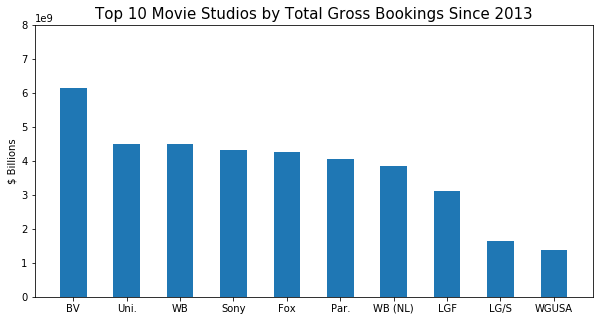

<Figure size 720x360 with 0 Axes>

In [440]:
#Aggregate total gross bookings 
total_gross_studios = top(df,0,10)

x_bar_1 = total_gross_studios.studio
y_bar_1 = total_gross_studios.Total_Gross

fig, ax = plt.subplots(figsize=(10,5))
plt.figure(figsize=(10,5))
ax.set_ylim([0,8000000000])
width = 0.5
ax.bar(x_bar_1, y_bar_1, width)
ax.set_title("Top 10 Movie Studios by Total Gross Bookings Since 2013", fontsize=15)
ax.set_ylabel('$ Billions')



-----------------------------------------------------------------------------------------------------------------------



__The industry is concentrated among top 10 players. Top 10 players generates more than 80% of total gross bookings__



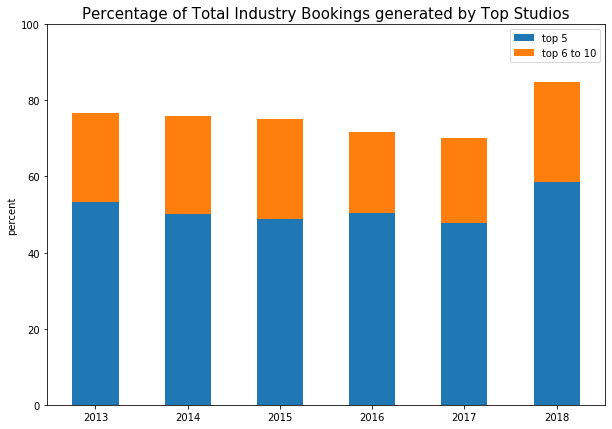

<Figure size 720x360 with 0 Axes>

In [436]:
list_of_year = [2013,2014,2015,2016,2017,2018]
percentage_5 = []
percentage_10 = [] 
for i in list_of_year:
    percentage_5.append(top(df,i,5).Total_Gross.sum() / top(df,i,1000).Total_Gross.sum() *100)
for i in list_of_year:
    percentage_10.append(top(df,i,10).Total_Gross.sum() / top(df,i,1000).Total_Gross.sum() *100 
                         - top(df,i,5).Total_Gross.sum() / top(df,i,1000).Total_Gross.sum() *100)
    
#Chart 

x_bar_2 = list_of_year
y_bar_2_1 = percentage_5 
y_bar_2_2 = percentage_10
width = 0.5

fig, ax = plt.subplots(figsize=(10,7))
plt.figure(figsize=(10,5))

ax.bar(x_bar_2, y_bar_2_1, width, label = 'top 5')
ax.bar(x_bar_2, y_bar_2_2, width, bottom=y_bar_2_1, label = 'top 6 to 10')
ax.set_ylim([0,100])
ax.set_ylabel("percent")
ax.set_title("Percentage of Total Industry Bookings generated by Top Studios", fontsize=15)
ax.legend(bbox_to_anchor=(1, 1), loc=1)
plt.show()


-------------------------------------------------------------------------------------------------------------------------------




__MSFT needs to achieve around 300M annually minimum in gross bookings to become top 10 players (based on 2017 data)__

(some data in 2018 missing)



Text(0, 0.5, '$ Billions')

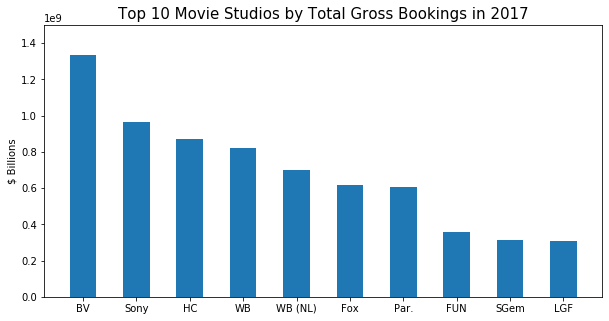

In [457]:
#Example: Gross bookings for top 10 studios in 2017
gross_studios_2018 = top(df,2017,10)

x_bar_2 = gross_studios_2018.studio
y_bar_2 = gross_studios_2018.Total_Gross

fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim([0,1500000000])
width = 0.5
ax.bar(x_bar_2, y_bar_2, width)
ax.set_title("Top 10 Movie Studios by Total Gross Bookings in 2017", fontsize=15)
ax.set_ylabel('$ Billions')


-------------------------------------------------------------------------------------------------------------------------------




__What kinds of movies Microsoft should produce ?__




In [446]:
movies = """ SELECT * FROM movies.imdb_title_basics
JOIN imdb_title_ratings on imdb_title_basics.tconst = imdb_title_ratings.tconst
where start_year > 2010
order by numvotes desc """

In [448]:
import mysql.connector
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
#import mysql.connector

In [449]:
movie_df = pd.read_sql_query(movies, con)
movie_df.sort_values(by = 'numvotes', ascending = False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
1,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
2,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
3,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
...,...,...,...,...,...,...,...,...,...
65445,tt3148362,Parallelnye miry,Parallelnye miry,2013,85.0,"Drama,Romance",tt3148362,5.0,5
65446,tt3149112,Brazilian Craftswoman,Brazilian Craftswoman,2013,NaN,Documentary,tt3149112,6.4,5
65447,tt3154314,Fragmentos de Paixão,Fragmentos de Paixão,2013,70.0,"Documentary,History",tt3154314,3.8,5
65448,tt3157604,Capgras,Capgras,2017,116.0,"Drama,Mystery,Thriller",tt3157604,5.2,5


In [424]:
histogram_numvotes = movie_df.numvotes


__Dataframe for top 10% movies based on number of votes on IMDB__




In [426]:
#top 10% of movies based on number of votes. Assumption is that higher number of votes correlates with high gross bookings. 
top_movies = movie_df.head(6706)
top_movies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
1,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
2,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
3,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
...,...,...,...,...,...,...,...,...,...
6701,tt1302019,Not Another Not Another Movie,Not Another Not Another Movie,2011,99.0,Comedy,tt1302019,2.7,1572
6702,tt1770672,Djinn,Djinn,2013,82.0,"Horror,Thriller",tt1770672,4.5,1571
6703,tt2063782,Laddaland,Ladda Land,2011,113.0,"Drama,Horror",tt2063782,6.4,1571
6704,tt2877104,Ethir Neechal,Ethir Neechal,2013,129.0,"Comedy,Romance,Sport",tt2877104,6.8,1570


In [470]:
from collections import Counter
counts = Counter(top_movies.genres.str.cat(sep=',').split(','))

In [469]:
final_df = pd.DataFrame.from_dict(counts, orient='index').sort_values(by = 0, ascending = False)
final_df['Genre'] = final_df.index.values
final_df['Count'] = final_df[0]
final_df = final_df.reset_index().drop(columns=['index',0])


__Top 5 popular genres are Drama, Comedy, Action, Thriller, and Crime (based on top 10% of movies ranked by number of votes on IMDB)__

(If a movie includes multiple genres, count each of those separately and then sum all together)



Text(0.5, 0, 'Genre')

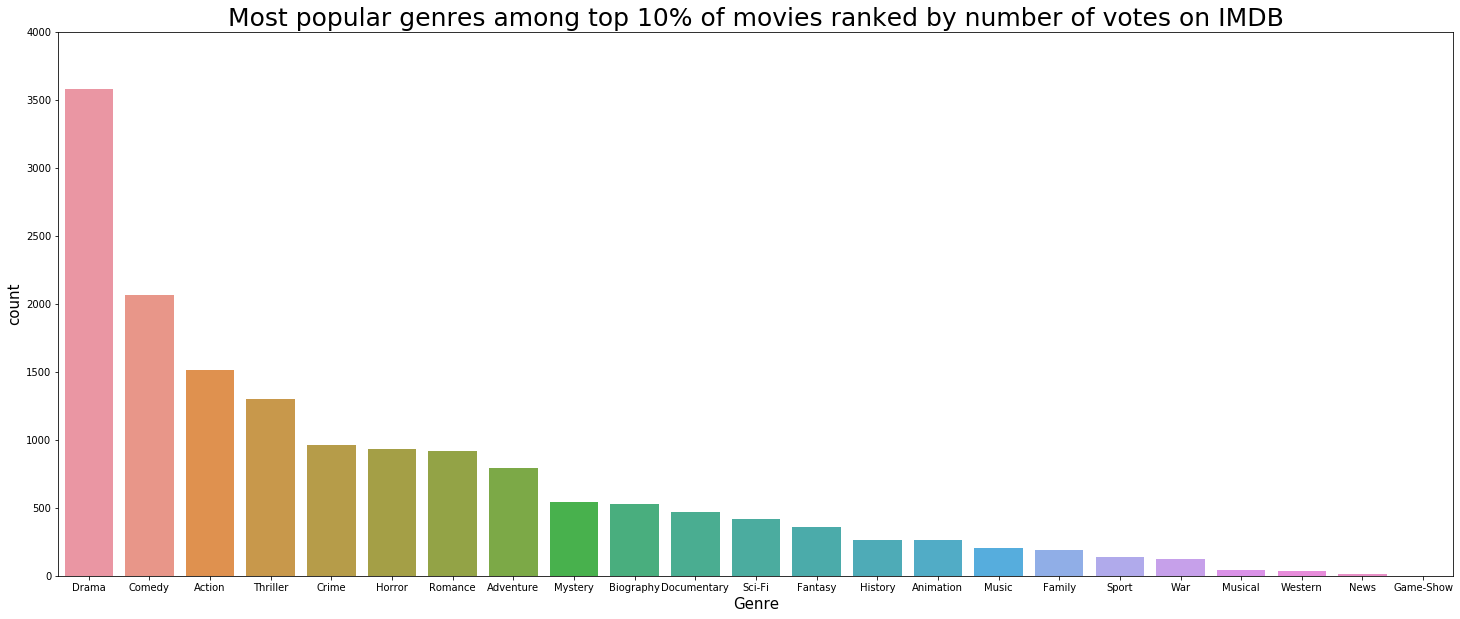

In [475]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(final_df.Genre,final_df.Count)
ax.set_ylim([0,4000])
ax.set_title("Most popular genres among top 10% of movies ranked by number of votes on IMDB", fontsize=25)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Genre', fontsize=15)


__But how about a highly rated movie?__ 



In [474]:
movie_df.averagerating.quantile([0.25,0.5,0.75])

0.25    5.5
0.50    6.5
0.75    7.4
Name: averagerating, dtype: float64

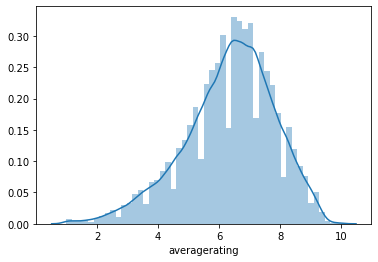

In [291]:
#distribution of movie ratings 
sns.distplot(histogram_averagerating)

In [479]:
great_movie = top_movies.sort_values(by = 'averagerating', ascending = False).head(1676)

Text(0.5, 0, 'Genre')

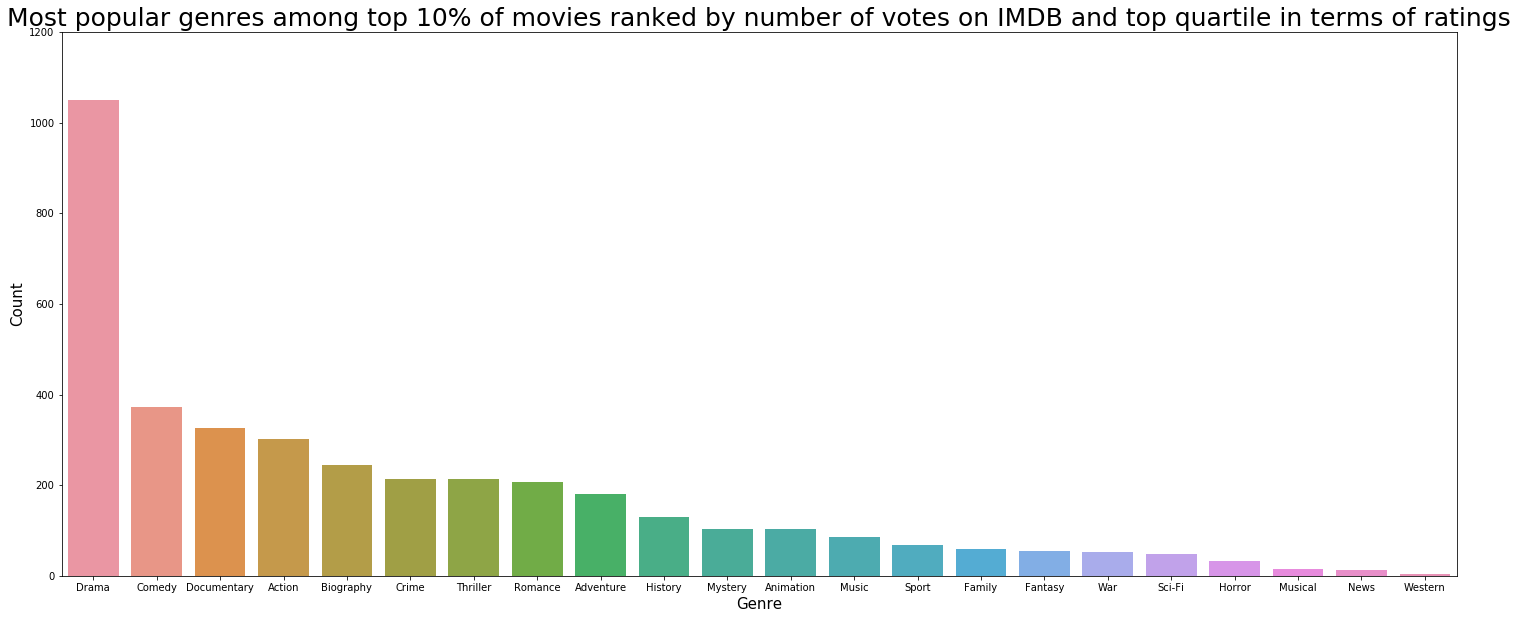

In [482]:
from collections import Counter
counts_1 = Counter(great_movie.genres.str.cat(sep=',').split(','))

great_movie_df = pd.DataFrame.from_dict(counts_1, orient='index').sort_values(by = 0, ascending = False)
great_movie_df['Genre'] = great_movie_df.index.values
great_movie_df['Count'] = great_movie_df[0]
great_movie_df = great_movie_df.reset_index().drop(columns=['index',0])

fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(great_movie_df.Genre,great_movie_df.Count)
ax.set_ylim([0,1200])
ax.set_title("Most popular genres among top 10% of movies ranked by number of votes on IMDB and top quartile in terms of ratings", fontsize=25)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Genre', fontsize=15)

In [474]:
movie_df.averagerating.quantile([0.25,0.5,0.75])

0.25    5.5
0.50    6.5
0.75    7.4
Name: averagerating, dtype: float64

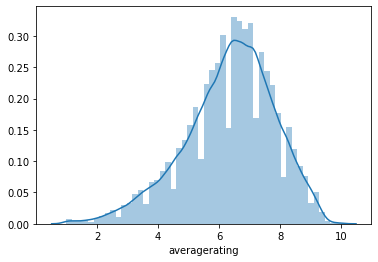

In [291]:
#distribution of movie ratings 
sns.distplot(histogram_averagerating)